# Building a random forest

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [31]:
boston_housing_df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [32]:
print(boston_housing_df.shape)
boston_housing_df

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [33]:
### Y is the category column and X is the matrix with all other columns
X = boston_housing_df.values[:, 0:12]
Y = boston_housing_df.values[:,13]

In [52]:
### Viewing the Classification Column mapped to values
boston_housing_df.iloc[0]

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
b          396.90000
lstat        4.98000
medv        24.00000
Name: 0, dtype: float64

In [35]:
### Number of unique classes (Y values)
print(np.unique(Y))
len(np.unique(Y))

[ 5.   5.6  6.3  7.   7.2  7.4  7.5  8.1  8.3  8.4  8.5  8.7  8.8  9.5
  9.6  9.7 10.2 10.4 10.5 10.8 10.9 11.  11.3 11.5 11.7 11.8 11.9 12.
 12.1 12.3 12.5 12.6 12.7 12.8 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.8
 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.6 15.7 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 17.  17.1
 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5
 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9
 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.4
 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.8
 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2
 24.3 24.4 24.5 24.6 24.7 24.8 25.  25.1 25.2 25.3 26.2 26.4 26.5 26.6
 26.7 27.  27.1 27.5 27.9 28.  28.1 28.2 28.4 28.5 28.6 28.7 29.  29.1
 29.4 29.6 29.8 29.9 30.1 30.3 30.5 30.7 30.8 31.  31.1 31.2 31.5 31.6
 31.7 32.  32.2 32.4 32.5 32.7 32.9 33.  33.1 33.2 33.3 33.4 33.8 34.6
 34.7 3

229

In [36]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        3.9690e+02],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        3.9690e+02],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        3.9283e+02],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        3.9690e+02],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        3.9345e+02],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        3.9690e+02]])

In [37]:
i_max = 50 # length of matrix (number repeats)
j_max = 50 # width of matrix (bootstrap replicates)

In [38]:
# err_0 is the base (Single Trees)
cases = len(boston_housing_df)
err_0 = np.zeros((i_max,1)) #ToDo just confirm
for i in range(i_max):
    
    for j in range(1):
        print(i, j, end="\r")
        df_to_use_sample = boston_housing_df
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with rounded mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        #col_means = np.nanmean(X_train, axis=0)
        #inds = np.where(np.isnan(X_train))
        #X_train[inds] = np.take(col_means, inds[1])
        ### Rounding, because all values are categorical, not numerical
        #col_means = np.round(np.nanmean(X_test, axis=0))
        #inds = np.where(np.isnan(X_test))
        #X_test[inds] = np.take(col_means, inds[1])
        
        # Create Decision Tree classifer object
        clf = DecisionTreeRegressor()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err_0[i,j] = err_0[i,j] + 1
        err_0[i,j]= err_0[i,j]/len(y_test)

In [39]:
### Viewing the base
err_0

array([[0.05882353],
       [0.1372549 ],
       [0.05882353],
       [0.1372549 ],
       [0.11764706],
       [0.15686275],
       [0.11764706],
       [0.07843137],
       [0.09803922],
       [0.11764706],
       [0.19607843],
       [0.11764706],
       [0.17647059],
       [0.01960784],
       [0.1372549 ],
       [0.09803922],
       [0.17647059],
       [0.07843137],
       [0.01960784],
       [0.19607843],
       [0.09803922],
       [0.1372549 ],
       [0.09803922],
       [0.11764706],
       [0.1372549 ],
       [0.17647059],
       [0.1372549 ],
       [0.1372549 ],
       [0.05882353],
       [0.07843137],
       [0.15686275],
       [0.1372549 ],
       [0.19607843],
       [0.15686275],
       [0.1372549 ],
       [0.21568627],
       [0.07843137],
       [0.03921569],
       [0.1372549 ],
       [0.11764706],
       [0.09803922],
       [0.17647059],
       [0.1372549 ],
       [0.09803922],
       [0.09803922],
       [0.07843137],
       [0.07843137],
       [0.058

In [63]:
# Random Forest
cases = len(boston_housing_df)
err = np.zeros((1,j_max))
for i in range(1):
    
    for j in range(j_max):
        print(i, j, end="\r")
        X = boston_housing_df.values[:, 0:12]
        Y = boston_housing_df.values[:, 13]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1) # 70% training and 30% test
#        X_train = X_train.astype(float)
#        X_test = X_test.astype(float)
        # replace missing values with mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        #col_means = np.nanmean(X_train, axis=0)
#         inds = np.where(np.isnan(X_train))
#         X_train[inds] = np.take(col_means, inds[1])
#         ### Rounding, because all values are categorical, not numerical
#         col_means = np.round(np.nanmean(X_test, axis=0))
#         inds = np.where(np.isnan(X_test))
#         X_test[inds] = np.take(col_means, inds[1])
        # Create RF classifer object
        clf = RandomForestRegressor(max_depth=None, random_state=None, n_estimators=100, max_features=1, bootstrap=False)
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        err[i,j] = np.mean(np.square(np.subtract(y_test,y_pred)))


In [64]:
err

array([[58.01409751, 19.70857678, 18.63804469,  8.84924265, 17.73980391,
        19.05057335, 18.98687335, 19.18154224,  8.7863018 , 10.33437624,
        12.04348769,  7.59421383,  8.57460612, 23.66455667, 12.566756  ,
        17.1729202 , 48.43691544, 10.72265883, 14.20142514, 14.16122556,
        11.91380231, 14.96516867, 32.61442443, 12.64553667, 17.7360768 ,
        14.40750463, 14.686375  ,  8.75638675, 17.80648623, 27.03101129,
        11.91947429, 30.63925605,  9.28558722, 15.92913237, 12.58131473,
        26.3811329 ,  8.37384198, 24.75660476, 19.65711549, 17.85853698,
        28.97724339, 18.08588216, 18.59085028, 25.80249251, 16.66211294,
         9.90771012, 22.28085827, 15.51857704, 10.82228981, 11.67966671]])

In [42]:
###AdaBoost
cases = len(boston_housing_df)
errAdaBoost = np.zeros((1,j_max))
for i in range(1):
    
    for j in range(j_max):
        print(i, j, end="\r")
        df_to_use_sample = boston_housing_df.sample(n=cases, replace=True)
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        #col_means = np.nanmean(X_train, axis=0)
#         inds = np.where(np.isnan(X_train))
#         X_train[inds] = np.take(col_means, inds[1])
#         ### Rounding, because all values are categorical, not numerical
#         col_means = np.round(np.nanmean(X_test, axis=0))
#         inds = np.where(np.isnan(X_test))
#         X_test[inds] = np.take(col_means, inds[1])
        # Create RF classifer object
        clf = AdaBoostRegressor(random_state=None, n_estimators=100)
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                errAdaBoost[i,j] = errAdaBoost[i,j] + 1
        errAdaBoost[i,j]= errAdaBoost[i,j]/len(y_test)

In [43]:
### Viewing err
err

array([[0.50657895, 0.36842105, 0.36184211, 0.40789474, 0.375     ,
        0.42763158, 0.39473684, 0.49342105, 0.42105263, 0.40131579,
        0.36842105, 0.40131579, 0.42763158, 0.41447368, 0.38157895,
        0.43421053, 0.43421053, 0.42763158, 0.42105263, 0.46052632,
        0.375     , 0.40789474, 0.42105263, 0.45394737, 0.50657895,
        0.38815789, 0.50657895, 0.48684211, 0.46710526, 0.40131579,
        0.42105263, 0.46710526, 0.40131579, 0.44078947, 0.36184211,
        0.41447368, 0.46052632, 0.47368421, 0.48684211, 0.43421053,
        0.39473684, 0.48026316, 0.38815789, 0.35526316, 0.40131579,
        0.41447368, 0.38815789, 0.48026316, 0.43421053, 0.5       ]])

The paper found 32.1% for err0 (Single Tree) and 23.1% for RF, 26.6% for AdaBoost which is the improvement from bagging

0.11764705882352938


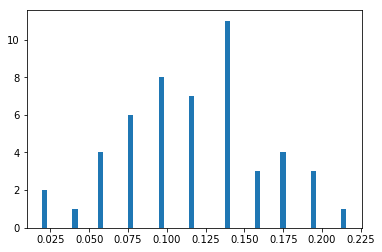

In [44]:
print(err_0.mean())
plt.hist(err_0, bins = 60)
plt.show()

17.934013015425272


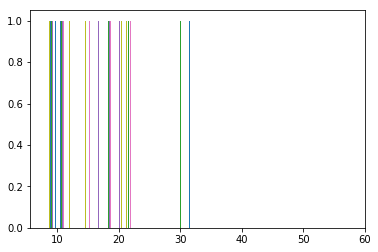

In [65]:
print(err.mean())
import matplotlib.pyplot as plt
plt.hist(err)
plt.show()

0.7265789473684212


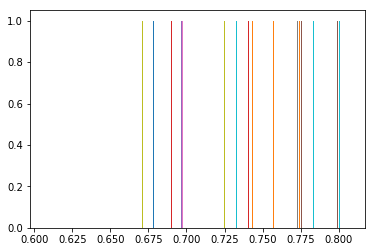

In [46]:
print(errAdaBoost.mean())
import matplotlib.pyplot as plt
plt.hist(errAdaBoost)
plt.show()

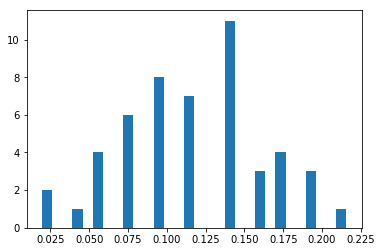

In [47]:
plt.hist(np.concatenate(err_0), bins = 30)
plt.show()

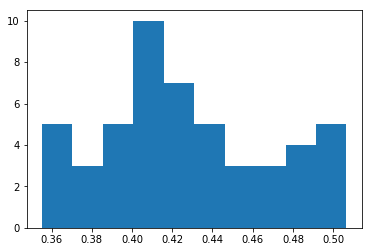

In [48]:
plt.hist(np.concatenate(err))
plt.show()

| Algorithm                   | Paper | Our results |   |
|-----------------------------|-------|-------------|---|
| Selection \(Decision Tree\) | 0\.32 | 0\.31       |   |
| AdaBoost                    | 0\.23 | 0\.13       |   |
| Random Forest               | 0\.27 | 0\.19       |   |